# Chapter 58: Dictionary Learning

### Runs simulations for Example 3 in Chapter 58: Dictionary Learning (vol. III)


TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs.  The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Saba Nasiri. 

required librarirs:

1. soft_threshold (This function is included in the Github repository)
2. lasso_minimizer (This function is included in the Github repository)
3. hadamard_matrix_product (This function is included in the Github repository)
4. hadamard_matrix_division (This function is included in the Github repository)
5. numpy
6. scipy.io
7. matplotlib.pyplot

In [1]:
from soft_threshold import soft_threshold
from lasso_minimizer import lasso_minimizer
from hadamard_matrix_product import hadamard_matrix_product
from hadamard_matrix_division import hadamard_matrix_division
import numpy as np
import scipy.io
import matplotlib.pyplot as plt


## Example 58.3 (Application to MNIST dataset})

We illustrate the operation of the multiplicative update algorithm (58.65) by applying it to the MNIST "handwritten digits" dataset encountered earlier in Examples 52.3. The dataset consists of 60,000 labeled training samples. Each entry in the dataset is a 28 $\times$ 28 grayscale image, which we transform into an $M=784-$long feature vector, $h_n$. Each pixel in the image and, therefore, each entry in $h_n$, assumes nonnegative integer values in the range $[0,255]$. Every feature vector (or image) is assigned an integer label in the range 0--9 depending on which digit the image corresponds to. The earlier Fig. 52.6 showed randomly selected images from the training dataset.
 
 
 
In this example, we do not center or normalize the feature vectors and keep their entries in the range $[0,255]$. We employ $N=10,000$ samples and construct a data matrix $X$ of size $M\times N$, where $M=784$ is the size of each feature vector. In this way, each column of $X$ corresponds to the vectorized image of a handwritten digit. We construct two separate dictionaries: one with $K=9$ atoms and another with $K=64$ atoms for illustration purposes. The dictionary $W$ has size $M\times K$. This  allows us to determine dictionaries with $9$ and $64$ elementary images that can be composed together to approximate the original images (or to generate new sample images). We run the multiplicative update algorithm (58.65) for $1000$ iterations and plot the resulting dictionaries in Fig. 58.3. The figure also shows several original handwritten digits selected at random from the MNIST dataset and their approximations that follow from the dictionary representation $X\approx WZ$.

In [2]:
# application to MNIST dataset with NON-NEGATIVE ENTRIES

data = scipy.io.loadmat('./data/mnist.mat') # load mnist data; pixels between [0,255];
train_features = data['trainX'] # 60,000 rows x 784 columns; each row is a training feature for one image

N = 10000

features_train = train_features[0:N, :]


In [3]:
X = features_train.T
M = 784
K1 = 3 # or K1 = 8
K = K1*K1
W = np.random.rand(M, K)
Z = np.random.rand(K, N)

Mmax = 1000
for m in range(Mmax): # multiplicative update algorithm
    print(m)
    A = np.matmul(W.T, X)
    B = np.matmul(np.matmul(W.T, W), Z)
    C = hadamard_matrix_division(A, B)
    Z = hadamard_matrix_product(Z, C)
    
    D = np.matmul(X, Z.T)
    E = np.matmul(np.matmul(W, Z), Z.T)
    F = hadamard_matrix_division(D, E)
    W = hadamard_matrix_product(W, F)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

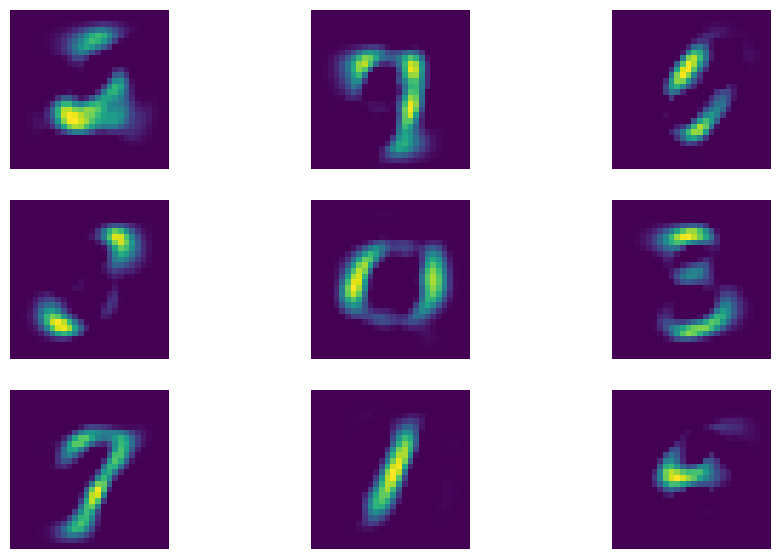

In [5]:
# Let us display the dictionary

# figure 3 (part of the figure; atoms and approximations)

f, axs =  plt.subplots(K1, K1, figsize=(11,7))
for n in np.arange(0, K1*K1):
    hat_h = W[:, n]
    image_example = hat_h.reshape(28, 28)
    if n>=0 and n<K1:
        axs[0][n%3].imshow(image_example)
        axs[0][n%3].axis('off')
        
    elif n>=K1 and n<2*K1:
        axs[1][n%3].imshow(image_example)
        axs[1][n%3].axis('off')
        
    if n>=2*K1 and n<3*K1:
        axs[2][n%3].imshow(image_example)
        axs[2][n%3].axis('off')
        
# plt.savefig('fig 58.3.1.pdf')

(Figure 58.3, first part) The plots on the left show the $9$ and $64$ atoms in the  $784\times K$  dictionary $W$ obtained by  means of the multiplicative update algorithm (58.65) applied the $N=10,000$ samples from the MNIST dataset. The plots on the right show several original handwritten digits from the MNIST dataset and their approximations that follow from the dictionary representation $X\approx WZ$. 

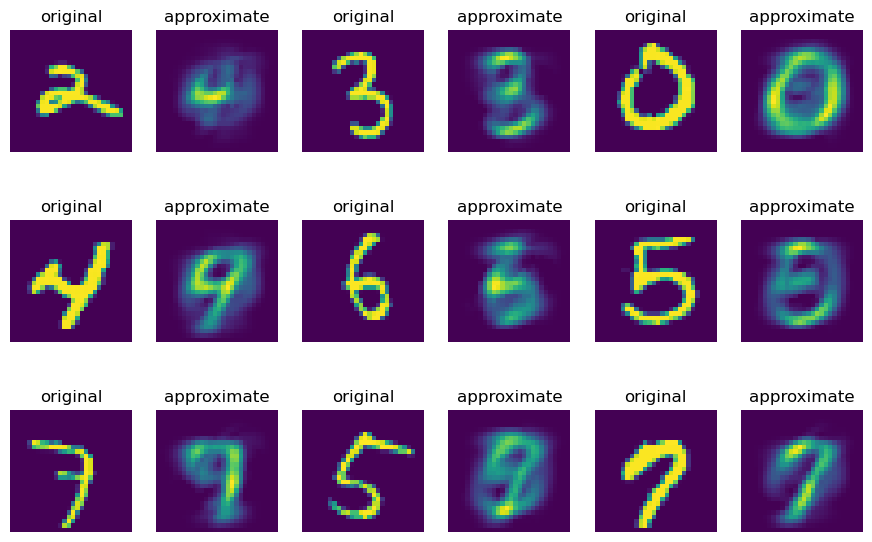

In [6]:
f, axs =  plt.subplots(3, 6, figsize=(11,7))

Xhat = np.matmul(W, Z) # Let us display X and Xhat = WZ
K1 = 3

for m in range(9):
    n = np.random.randint(N)
    x = X[:, n]
    z = Z[:, n]
    xhat = np.matmul(W, z)
    image_example = x.reshape(28, 28)
    if m>=0 and m<K1:
        axs[m%3][0].imshow(image_example)
        axs[m%3][0].axis('off')
        axs[m%3][0].set_title('original')
        
    if m>=K1 and m<2*K1:
        axs[m%3][2].imshow(image_example)
        axs[m%3][2].axis('off')
        axs[m%3][2].set_title('original')
        
    if m>=2*K1 and m<3*K1:
        axs[m%3][4].imshow(image_example)
        axs[m%3][4].axis('off')
        axs[m%3][4].set_title('original')
        
        
    image_hat = xhat.reshape(28, 28)
    if m>=0 and m<K1:
        axs[m%3][1].imshow(image_hat)
        axs[m%3][1].axis('off')
        axs[m%3][1].set_title('approximate')
        
    if m>=K1 and m<2*K1:
        axs[m%3][3].imshow(image_hat)
        axs[m%3][3].axis('off')
        axs[m%3][3].set_title('approximate')
        
    if m>=2*K1 and m<3*K1:
        axs[m%3][5].imshow(image_hat)
        axs[m%3][5].axis('off')
        axs[m%3][5].set_title('approximate')
        
    
    
    
# plt.savefig('fig 58.3.2.pdf')

(Figure 58.3, second part) The plots on the left show the $9$ and $64$ atoms in the  $784\times K$  dictionary $W$ obtained by  means of the multiplicative update algorithm (58.65) applied the $N=10,000$ samples from the MNIST dataset. The plots on the right show several original handwritten digits from the MNIST dataset and their approximations that follow from the dictionary representation $X\approx WZ$. 